Extracting Market Risk Factors...
Explained Variance (PC1 - The Market): 82.6%
Explained Variance (PC2 - Sector Risk): 4.6%


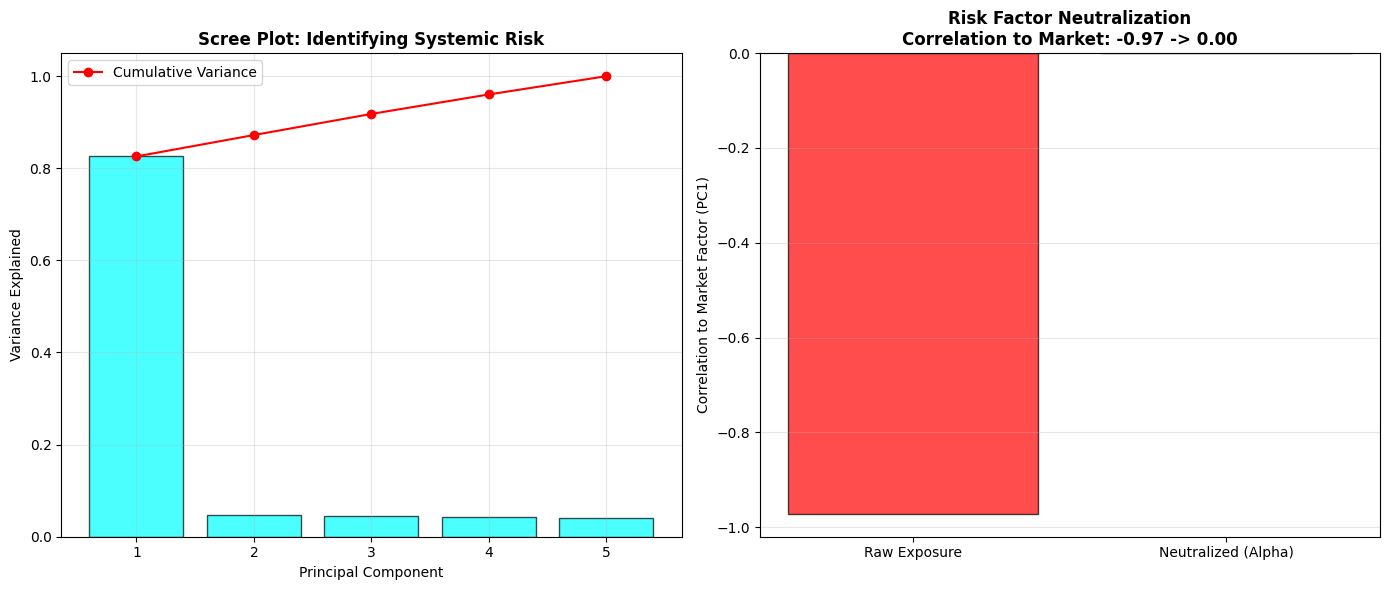

--------------------------------------------------
STRATEGIC INSIGHT:
The Green Bar represents pure Alpha potential.
By orthogonalizing the feature against PC1, we ensure our bets are unique
and not just a leveraged bet on the S&P 500.
--------------------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CORE ALGORITHM: PCA FROM SCRATCH ---

class RiskFactorPCA:
    """
    Principal Component Analysis (PCA) via Singular Value Decomposition (SVD).

    STRATEGIC DOCTRINE:
    Financial data is noisy. PCA helps us separate 'Signal' (Eigenvectors with high variance)
    from 'Noise' (Eigenvectors with low variance).

    CRITICAL APPLICATION:
    We use PC1 (The First Principal Component) as a proxy for 'The Market' (Beta).
    By removing PC1, we 'Neutralize' our features to isolate pure Alpha.
    """
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio = None

    def fit(self, X):
        # 1. Standardize (Center the data)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Covariance Matrix
        # Note: We divide by n-1 for unbiased estimator (Bessel's correction)
        cov_matrix = np.cov(X_centered, rowvar=False)

        # 3. Eigen Decomposition
        # We use eigh because covariance matrices are symmetric (Hermitian)
        # eigenvalues (w), eigenvectors (v)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # 4. Sort indices in descending order (High variance to Low variance)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # 5. Store results
        self.components = eigenvectors[:, :self.n_components]

        # Calculate Explained Variance Ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = eigenvalues / total_variance

        return self

    def transform(self, X):
        # Project data onto the principal components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

# --- 2. RISK MANAGEMENT: FEATURE NEUTRALIZATION ---

def neutralize_series(target, risk_factor):
    """
    Removes the influence of a risk factor (e.g., Market Beta) from a target series.
    Formula: Residual = Target - (Beta * Risk_Factor)
    """
    # Simple OLS to find Beta
    # beta = cov(target, factor) / var(factor)
    numerator = np.dot(target, risk_factor)
    denominator = np.dot(risk_factor, risk_factor)
    beta = numerator / denominator

    # Subtract the exposure
    neutralized = target - (beta * risk_factor)
    return neutralized

# --- 3. MARKET SIMULATION & EXECUTION ---

# Generate Synthetic "Market" Data
# Imagine 5 stocks that are all highly correlated (Market Mode)
rng = np.random.default_rng(42)
n_samples = 1000

# The "Market Factor" (Hidden latent variable)
market_factor = rng.normal(0, 1, n_samples)

# 5 Stocks: All follow the market, plus some noise
stock_A = 1.5 * market_factor + rng.normal(0, 0.5, n_samples)
stock_B = 0.8 * market_factor + rng.normal(0, 0.5, n_samples)
stock_C = 1.2 * market_factor + rng.normal(0, 0.5, n_samples)
stock_D = 0.5 * market_factor + rng.normal(0, 0.5, n_samples)
stock_E = -0.2 * market_factor + rng.normal(0, 0.5, n_samples) # Inverse correlation

data = np.column_stack([stock_A, stock_B, stock_C, stock_D, stock_E])
feature_names = ['Stock A', 'Stock B', 'Stock C', 'Stock D', 'Stock E']

# --- 4. EXECUTION ---
print("Extracting Market Risk Factors...")
pca = RiskFactorPCA(n_components=5)
pca.fit(data)

print(f"Explained Variance (PC1 - The Market): {pca.explained_variance_ratio[0]*100:.1f}%")
print(f"Explained Variance (PC2 - Sector Risk): {pca.explained_variance_ratio[1]*100:.1f}%")

# Get the "Market Signal" (PC1 projection)
factors = pca.transform(data)
market_signal = factors[:, 0]

# NEUTRALIZE Stock A against the Market
stock_A_neutral = neutralize_series(stock_A, market_signal)

# --- 5. VISUALIZATION (THE BOARDROOM CHARTS) ---
plt.figure(figsize=(14, 6))

# Plot 1: The Scree Plot (Variance Explained)
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), pca.explained_variance_ratio, color='cyan', alpha=0.7, edgecolor='black')
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio), 'r-o', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot: Identifying Systemic Risk', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Neutralization Effect
plt.subplot(1, 2, 2)
# Correlation of Stock A to Market BEFORE
corr_before = np.corrcoef(stock_A, market_signal)[0, 1]
# Correlation of Stock A to Market AFTER
corr_after = np.corrcoef(stock_A_neutral, market_signal)[0, 1]

bars = [corr_before, corr_after]
colors = ['red', 'green']
plt.bar(['Raw Exposure', 'Neutralized (Alpha)'], bars, color=colors, alpha=0.7, edgecolor='black')
plt.title(f'Risk Factor Neutralization\nCorrelation to Market: {corr_before:.2f} -> {corr_after:.2f}', fontsize=12, fontweight='bold')
plt.ylabel('Correlation to Market Factor (PC1)')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("-" * 50)
print("STRATEGIC INSIGHT:")
print("The Green Bar represents pure Alpha potential.")
print("By orthogonalizing the feature against PC1, we ensure our bets are unique")
print("and not just a leveraged bet on the S&P 500.")
print("-" * 50)